<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Построение-рекомендательной-системы-товаров-электроники-на-основе-отзывов-с-Амазон" data-toc-modified-id="Построение-рекомендательной-системы-товаров-электроники-на-основе-отзывов-с-Амазон-0.1">Построение рекомендательной системы товаров электроники на основе отзывов с Амазон</a></span></li></ul></li><li><span><a href="#Table-of-contents:" data-toc-modified-id="Table-of-contents:-1">Table of contents:</a></span></li><li><span><a href="#Table-of-contents:" data-toc-modified-id="Table-of-contents:-2">Table of contents:</a></span></li><li><span><a href="#General-analysis-" data-toc-modified-id="General-analysis--3">General analysis <a class="anchor" id="2"></a></a></span></li><li><span><a href="#Distribution-of-ratings-" data-toc-modified-id="Distribution-of-ratings--4">Distribution of ratings <a class="anchor" id="3"></a></a></span></li><li><span><a href="#Distribution-of-the-time-of-the-first-ratings-" data-toc-modified-id="Distribution-of-the-time-of-the-first-ratings--5">Distribution of the time of the first ratings <a class="anchor" id="4"></a></a></span></li><li><span><a href="#Checking-and-reducing-matrix-sparsity-" data-toc-modified-id="Checking-and-reducing-matrix-sparsity--6">Checking and reducing matrix sparsity <a class="anchor" id="5"></a></a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-6.1">1</a></span></li><li><span><a href="#2" data-toc-modified-id="2-6.2">2</a></span></li><li><span><a href="#3" data-toc-modified-id="3-6.3">3</a></span></li></ul></li><li><span><a href="#Collaborative-filtering.-Item-based.-" data-toc-modified-id="Collaborative-filtering.-Item-based.--7">Collaborative-filtering. Item-based. <a class="anchor" id="7"></a></a></span><ul class="toc-item"><li><span><a href="#Building-the-baseline-model-by-own-hands-" data-toc-modified-id="Building-the-baseline-model-by-own-hands--7.1">Building the baseline model by own hands <a class="anchor" id="8"></a></a></span></li><li><span><a href="#Building-models-with-surprise-library-" data-toc-modified-id="Building-models-with-surprise-library--7.2">Building models with surprise library <a class="anchor" id="9"></a></a></span><ul class="toc-item"><li><span><a href="#KNNBasic" data-toc-modified-id="KNNBasic-7.2.1">KNNBasic</a></span></li><li><span><a href="#KNNWithMeans" data-toc-modified-id="KNNWithMeans-7.2.2">KNNWithMeans</a></span></li></ul></li></ul></li><li><span><a href="#Popular-based-algorithms-" data-toc-modified-id="Popular-based-algorithms--8">Popular-based algorithms <a class="anchor" id="10"></a></a></span><ul class="toc-item"><li><span><a href="#The-most-popular-this-year-" data-toc-modified-id="The-most-popular-this-year--8.1">The most popular this year <a class="anchor" id="11"></a></a></span></li><li><span><a href="#Weighted-rating-system-" data-toc-modified-id="Weighted-rating-system--8.2">Weighted rating system <a class="anchor" id="12"></a></a></span></li><li><span><a href="#RecSys-with-custom-rating-score-" data-toc-modified-id="RecSys-with-custom-rating-score--8.3">RecSys with custom rating score <a class="anchor" id="13"></a></a></span></li><li><span><a href="#Comparison-of-results-" data-toc-modified-id="Comparison-of-results--8.4">Comparison of results <a class="anchor" id="14"></a></a></span></li></ul></li></ul></div>

### Построение рекомендательной системы товаров электроники на основе отзывов с Амазон

## Table of contents:
* [Exploratory Data Analysis](#1)
    * [General analysis](#2)
    * [Distribution of ratings](#3)
    * [Distribution of the time of the first ratings](#4)
    * [Checking and reducing matrix sparsity](#5)
* [Building Models](#6)
    * [Collaborative-filtering. Item-based](#7)
        * [Building the baseline model by own hands](#8)
        * [Building models with surprise library](#9)
    * [Popular-based algorithms](#10)
        * [The most popular this year](#11)
        * [Weighted rating system](#12)
        * [RecSys with custom rating score](#13)
        * [Comparison of results](#14)
* [Building Final Recommendation System](#15)

## Table of contents:
* [Introduction](#1)
* [Exploratory Data Analysis](#2)
    * [General analysis](#3)
    * [Distribution of target](#4)
* [Data Preparation](#5)
    * [Removing unnecessary columns](#6)
    * [Missings problem solving](#7)
    * [Variable Encoding](#8)
        * [Binary variables](#9)
        * [Multilevel variables](#10)
    * [Dimension reduction](#11)
    * [Building samples](#12)
* [Building Models](#13)
    * [Logistic Regression](#14)
    * [Gradient Boosting](#15)
    * [Neural Network](#16)
* [Сonclusions](#17)
    * [Results explanation](#18)
    * [Possible improvements](#19)

Целью данной работы является построение рекомендательной системы для товаров электроники на основе user-item матрицы рейтингов с платформы Амазон. Первая часть работы посвящена анализу входного набора данных и уменьшению разреженности матрицы. Во второй части реализовано построение различных моделей, выбор наиболее оптимальных и их гибридизация.

In [251]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from tqdm import tqdm_notebook
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

from surprise import KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

In [77]:
# !pip install surprise

     |████████████████████████████████| 11.8 MB 1.4 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl size=765202 sha256=882a2c7626ac57915feccf4f568db0a6413b7c1c2434e128264026f71b421d02
  Stored in directory: /Users/egorvasilev/Library/Caches/pip/wheels/20/91/57/2965d4cff1b8ac7ed1b6fa25741882af3974b54a31759e10b6
Successfully built scikit-surprise
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [5]:
# Import Data
df_data = pd.read_csv("ratings_Electronics.csv", header = None, names = ['User_id', 'Product_id', 'Rating', 'TimeStamp'])
# Calculating helpful fields
df_data['DateTime'] = df_data.apply(lambda x: datetime.fromtimestamp(x['TimeStamp']), axis = 1)
df_data['Year'] = df_data.apply(lambda x: x['DateTime'].year, axis = 1)
df_data['Month'] = df_data.apply(lambda x: x['DateTime'].month, axis = 1)
df_data.head()

,User_id,Product_id,Rating,TimeStamp,DateTime,Year,Month
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,2013-04-13 04:00:00,2013,4
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,2012-07-01 04:00:00,2012,7
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,2013-04-29 04:00:00,2013,4
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,2013-07-22 04:00:00,2013,7
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,2012-04-18 04:00:00,2012,4


# Exploratory Data Analysis <a class="anchor" id="1"></a>

## General analysis <a class="anchor" id="2"></a>

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   User_id     object        
 1   Product_id  object        
 2   Rating      float64       
 3   TimeStamp   int64         
 4   DateTime    datetime64[ns]
 5   Year        int64         
 6   Month       int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 417.9+ MB


In [7]:
# Missing values check
print(f"Count of missing values: \n{df_data.isnull().sum()}")

Count of missing values: 
User_id       0
Product_id    0
Rating        0
TimeStamp     0
DateTime      0
Year          0
Month         0
dtype: int64


In [50]:
# Duplicates check
df_data[df_data.duplicated()].any()

User_id       False
Product_id    False
Rating        False
TimeStamp     False
DateTime      False
Year          False
Month         False
dtype: bool

In [8]:
df_data.describe(include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


Можно заметить, что средний рейтинг почти на 1 меньше медианного, в то время, как медианный рейтинг равен максимальному значению. Это может говорить о:
1. Смещении рейтингов вправо (более 50% проставленных оценок равны ее максимальной величине). Вероятно это связано с тем, что зачастую пользователи, совершая одну покупку, ставят ей, не задумываясь, максимальный рейтинг, если в целом их все устраивает или потому что "так принято". Аналогично, это может быть единственным рейтингом конкретного товара, недавно поступившего в продажу или не пользующегося спросом (за исключением собственного пиара продавца). Проверим эти гипотезы во время исследования распределения рейтингов.
2. Наличии достаточного числа низких оценок для снижения среднего значения почти на 1.


In [9]:
print(f"Number of observations = {len(df_data)}\nNumber of unique Items = {len(df_data['Product_id'].unique())}\nNumber of unique Users = {len(df_data['User_id'].unique())}")


Number of observations = 7824482
Number of unique Items = 476002
Number of unique Users = 4201696


## Distribution of ratings <a class="anchor" id="3"></a>

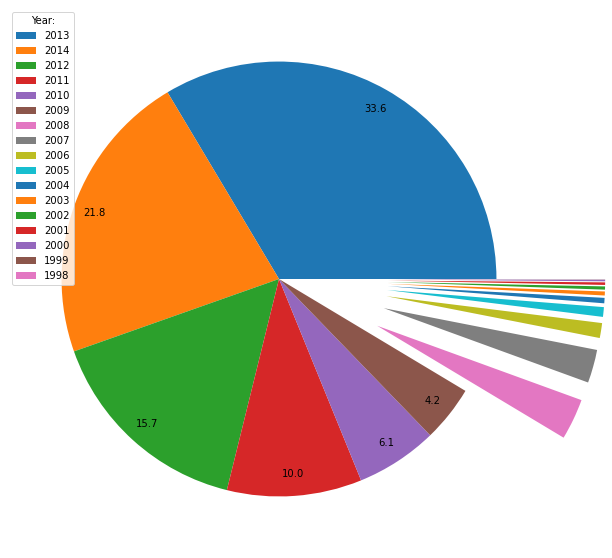

In [127]:
# Count of ratings per year
year_stat = dict(zip(df_data['Year'].value_counts().index, df_data['Year'].value_counts()))

plt.figure(figsize = (10, 10))
expl = 0.5
plt.pie(year_stat.values(), 
        autopct = lambda p: format(p, '.1f') if p > 4 else None, 
        pctdistance = 0.9,
        explode = ([0 if cnt > (0.04 * len(df_data)) else expl for cnt in year_stat.values()]))
plt.legend(title = 'Year:', labels = year_stat.keys());

Можно заметить, что в годы до 2010 имеем меньше 5% рейтингов.

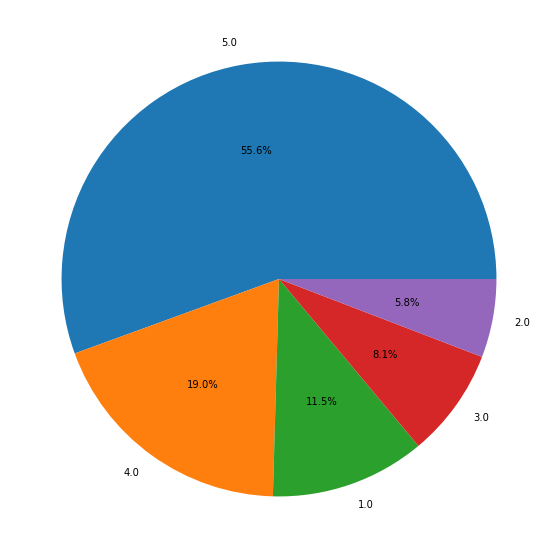

In [136]:
# Count of ratings per class
class_stat = dict(zip(df_data['Rating'].value_counts().index, df_data['Rating'].value_counts()))

plt.figure(figsize = (10, 10))
plt.pie(class_stat.values(), 
        autopct = '%.1f%%',
        labels = class_stat.keys());

А также, что абсолютное большинство рейтингов - 5.0.

## Distribution of the time of the first ratings <a class="anchor" id="4"></a>

Расчитаем число пришедших пользователей в каждый год, а также число пришедших пользователей по годам, проставивших 1 рейтинг. Здесь и далее делается допущение о том, что момент прихода пользователя (его первой покупки) равен или близок к моменту его первого оставленного отзыва.


In [10]:
# Building the table User - Year of first rating - Count of ratings
df_temp = pd.DataFrame({
    'User_id': df_data.groupby(by = 'User_id').Year.min().index,
    'Year_of_1st_rate': df_data.groupby(by = 'User_id').Year.min().values,
    'Count_of_rates': df_data.groupby(by = 'User_id').Rating.count().values
})
df_temp.head()

,User_id,Year_of_1st_rate,Count_of_rates
0,A00000262KYZUE4J55XGL,2012,1
1,A000063614T1OE0BUSKUT,2013,2
2,A00009182QVLSWIGHLS1B,2013,1
3,A00009661LC9LQPGKJ24G,2012,1
4,A00010809P09NUU6ZP6H,2013,1


In [11]:
# Building the table Year of first rating - Count of new users - Count of new users with 1 submitted rating
n = 1
df_stats = pd.DataFrame({
    'Year_of_1st_rate': df_temp.groupby(by = 'Year_of_1st_rate').User_id.count().index, 
    'Count_of_new_users': df_temp.groupby(by = 'Year_of_1st_rate').User_id.count().values,
    'Count_of_new_users_1r': df_temp[df_temp['Count_of_rates'] <= n].groupby(by = 'Year_of_1st_rate').User_id.count().values
})
df_stats.sort_values(by = 'Year_of_1st_rate', ascending = False)

,Year_of_1st_rate,Count_of_new_users,Count_of_new_users_1r
16,2014,802718,650569
15,2013,1289455,917565
14,2012,676370,447532
13,2011,464439,295810
12,2010,290704,176589
11,2009,204685,120425
10,2008,156353,89655
9,2007,136056,76883
8,2006,63852,36159
7,2005,41691,24076


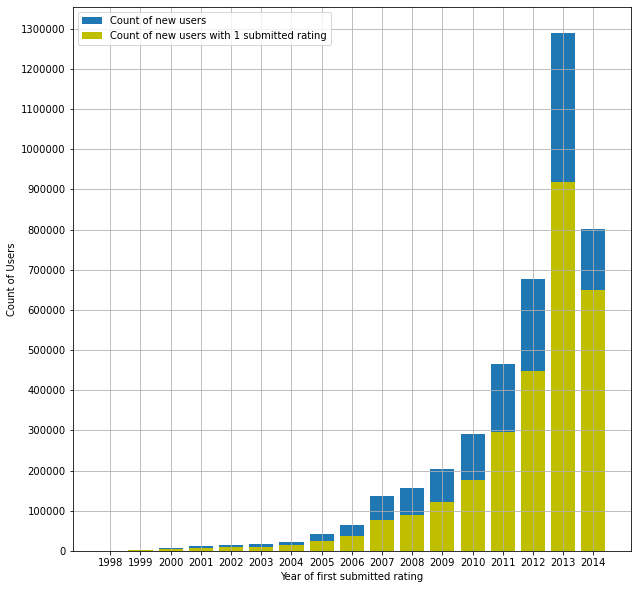

In [12]:
plt.figure(figsize = (10, 10))
plt.bar(df_stats['Year_of_1st_rate'], height = df_stats['Count_of_new_users'])
plt.xticks(df_stats['Year_of_1st_rate'])
plt.yticks(ticks = range(0, 1500000, 100000), labels = range(0, 1500000, 100000))
plt.grid()

plt.bar(df_stats['Year_of_1st_rate'], height = df_stats['Count_of_new_users_1r'], color = 'y')

plt.xlabel('Year of first submitted rating')
plt.ylabel('Count of Users')
plt.legend(labels = ['Count of new users', 'Count of new users with 1 submitted rating'], loc = 'best');

Видно, что в каждом году большинство пользователей, проставивших свой первый рейтинг - это пользователи, проставившие за все время как раз один этот рейтинг.

In [13]:
# Searching the percent of users who have given only one rating 
print(f"% of users who have given only one rating is: {100 * (len(df_temp[df_temp['Count_of_rates'] == 1]) / len(df_temp))}%")

% of users who have given only one rating is: 68.58735139334212%


In [23]:
# Searching the percent of items which have only one rating 
print(f"% of items with only one rating is: {100 * (sum(df_data.groupby(by = 'Product_id').Rating.count() == 1)/len(df_data.groupby(by = 'Product_id'))) }%")

% of items with only one rating is: 37.7599253784648%


Следствием такого высокого процента пользователей и товаров с одним рейтингом скорее всего будет высокая разреженность матрицы рейтингов. Проверим это далее.

## Checking and reducing matrix sparsity <a class="anchor" id="5"></a>

In [24]:
def sparse_check(data):
    # Bringing the matrix to the form user-item
    user_list = list(data.User_id.unique())
    item_list = list(data.Product_id.unique())
    ratings = list(data.Rating)

    rows = data.User_id.astype('category').cat.codes
    cols = data.Product_id.astype('category').cat.codes
    matrix = sparse.csr_matrix((ratings, (rows, cols)), shape = (len(user_list), len(item_list)))

    # Checking the sparsity of the matrix
    matrix_size = matrix.shape[0] * matrix.shape[1]
    ratings_cnt = len(matrix.nonzero()[0])
    sparsity = 100 * (1 - ratings_cnt / matrix_size)
    return sparsity

# We can also get it by:
# matrix = df_data.pivot(index = 'User_id', columns ='Product_id', values = 'Rating').fillna(0)
# non_zero = np.count_nonzero(matrix)
# whole_values = matrix.shape[0] * matrix.shape[1]
# sparsity = 100 * (1 - (non_zero / whole_values))
# matrix.nonzero()

In [26]:
sparse_check(df_data)

99.99960877897097

Как и ожидалось, разреженность слишком велика для применения алгоритмов. Попробуем следующие подходы ее уменьшения:

1. Удалить из рассмотрения старые данные (например, до 2011 года)
2. Удалить из рассмотрения записи пользователей, проставивших всего 1 рейтинг
3. Удалить из рассмотрения записи о товарах, имеющих всего 1 рейтинг

### 1

Попробуем убрать из набора старые данные, так как рейтингов за то время мало, и, скорее всего, их нельзя считать актуальными.

In [27]:
cut_off_list = [2007, 2008, 2009, 2010, 2011]
for cut_off in cut_off_list:
    df_data_temp = df_data[df_data['Year'] > cut_off]
    print(f"Cut off Year is {cut_off}\nSparsity = {sparse_check(df_data_temp)}")

Cut off Year is 2007
Sparsity = 99.99959580795648
Cut off Year is 2008
Sparsity = 99.99959004564401
Cut off Year is 2009
Sparsity = 99.99958081062994
Cut off Year is 2010
Sparsity = 99.999565068841
Cut off Year is 2011
Sparsity = 99.99953655248893


По-прежнему имеем большую разреженность. 

### 2

Попробуем из исходной выборки убрать из рассмотрения пользователей с одним проставленным рейтингом, которые пришли раньше 2012 года. Будем считать их единственный рейтинг неактуальным и мало информативным

Пользователей, которые пришли ранее 2012 года, но оставили более 1 рейтинга убирать не будем, так как это могут быть старые клиенты, периодически покупающие и оценивающие товары в магазине. Их рейтинги должны быть информативными, так как способствуют формированию картины о пользователях.

Пользователей, проставивших 1 рейтинг и пришедших позже 2012 года убирать так же не будем, так как это новые пользователи, которые, возможно, просто не успели купить достаточное число товаров. Будем считать их актуальными пользователями, чьи рейтинги могут внести вклад в прогноз.

In [30]:
# Delete from data users with one rating and year of the first rating < 2012

# Filter 1. Users with only one rating and year of the first rating < 2012
df_filter1 = df_temp[(df_temp['Year_of_1st_rate'] < 2012) & (df_temp['Count_of_rates'] <= 1)]
df_data_filt1 = df_data[~df_data['User_id'].isin(set(df_filter1['User_id']))]

In [31]:
sparse_check(df_data_filt1)

99.99954763442315

Разреженность остается высокой. Попробуем убрать пользователей с одним рейтингом за все время.

In [32]:
# Filter 2. All users with only one rating
df_filter2 = df_temp[df_temp['Count_of_rates'] <= 1]
df_data_filt2 = df_data[~df_data['User_id'].isin(set(df_filter2['User_id']))]
sparse_check(df_data_filt2)

99.99909464773002

Видно, что с помощью удаления из рассмотрения пользователей не удалось достичь приемлемой для применения алгоритмов разреженности. 

### 3

Попробуем разобраться с товарами. Для начала посмотрим, сколько товаров имеют лишь один рейтинг, и в какой год этот рейтинг был проставлен.

In [33]:
# Building the table Product - Year of first rating - Count of ratings

df_temp = pd.DataFrame({
    'Product_id': df_data.groupby(by = 'Product_id').Year.min().index,
    'Year_of_1st_rate': df_data.groupby(by = 'Product_id').Year.min().values,
    'Count_of_rates': df_data.groupby(by = 'Product_id').Rating.count().values
})
df_temp.head()

,Product_id,Year_of_1st_rate,Count_of_rates
0,0132793040,2013,1
1,0321732944,2012,1
2,0439886341,2012,3
3,0511189877,2014,6
4,0528881469,2010,27


In [34]:
# Building the table Year of first rating - Count of new Products - Count of new Products with 1 submitted rating

n = 1

df_stats = pd.DataFrame({
    'Year_of_1st_rate': df_temp.groupby(by = 'Year_of_1st_rate').Product_id.count().index, 
    'Count_of_new_products': df_temp.groupby(by = 'Year_of_1st_rate').Product_id.count().values,
    'Count_of_new_products_1r': pd.Series(data = {'1998': 0}, index = ['1998']).append(df_temp[df_temp['Count_of_rates'] <= n].groupby(by = 'Year_of_1st_rate').Product_id.count()).values
})
df_stats.sort_values(by = 'Year_of_1st_rate', ascending = False)



,Year_of_1st_rate,Count_of_new_products,Count_of_new_products_1r
16,2014,69938,47406
15,2013,125010,59179
14,2012,83487,26180
13,2011,60804,17053
12,2010,43317,10676
11,2009,26868,6488
10,2008,19552,4437
9,2007,17901,3773
8,2006,8837,1447
7,2005,6420,982


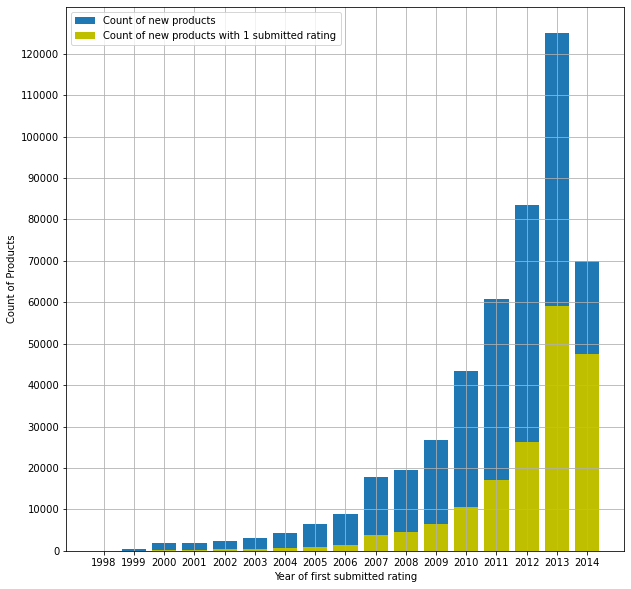

In [35]:
plt.figure(figsize = (10, 10))
plt.bar(df_stats['Year_of_1st_rate'], height = df_stats['Count_of_new_products'])
plt.xticks(df_stats['Year_of_1st_rate'])
plt.yticks(ticks = range(0, 130000, 10000), labels = range(0,130000, 10000))
plt.grid()

plt.bar(df_stats['Year_of_1st_rate'], height = df_stats['Count_of_new_products_1r'], color = 'y')

plt.xlabel('Year of first submitted rating')
plt.ylabel('Count of Products')
plt.legend(labels = ['Count of new products', 'Count of new products with 1 submitted rating'], loc = 'best');

Попробуем убрать из рассмотрения записи о товарах с одним рейтингом, появившиеся раньше 2014 года. Данные, появившиеся позднее будем считать рейтингами новых на рынке товаров. Также оставим прошлый фильтр на пользователей с 1 рейтингом.

In [37]:
# Filter 3. Items with one ratings with year fo the first rating < 2014 + Filter 2 
df_filter3 = df_temp[(df_temp['Year_of_1st_rate'] <= 2013) & (df_temp['Count_of_rates'] <= 1)]
df_data_filt3 = df_data[~df_data['Product_id'].isin(list(df_filter3['Product_id']))]
df_data_filt3 = df_data_filt3[~df_data_filt3['User_id'].isin(list(df_filter2['User_id']))]
sparse_check(df_data_filt3)

99.99883871274494

Приемлемой разреженности марицы по-прежнему не удалось достичь. Так как бОльший вклад в значение разреженности вносят товары (по каждому товару имеем более 4 млн возможных значений рейтингов), продолжим разбираться именно с ними.

Попробуем убрать из рассмотрения записи о товарах, чей последний проставленный рейтинг датируется ранее 2013 года. Исходим из предположения о том, что, если больше года никто не ставил рейтинг товару, то он либо не продается, либо не пользуется популярностью и не актуален.

In [39]:
# Building the table Product - Year of last submitted rating
df_temp = pd.DataFrame({
    'Product_id': df_data.groupby(by = 'Product_id').Year.max().index,
    'Year_of_last_rate': df_data.groupby(by = 'Product_id').Year.max().values})
df_temp.head()

,Product_id,Year_of_last_rate
0,0132793040,2013
1,0321732944,2012
2,0439886341,2013
3,0511189877,2014
4,0528881469,2014


In [40]:
# Building the table Year of last rating - count of products with last ratings
df_stats = pd.DataFrame({
    'Year_of_last_rate': df_temp.groupby(by = 'Year_of_last_rate').Product_id.count().index,
    'Count_of_products': df_temp.groupby(by = 'Year_of_last_rate').Product_id.count().values
})

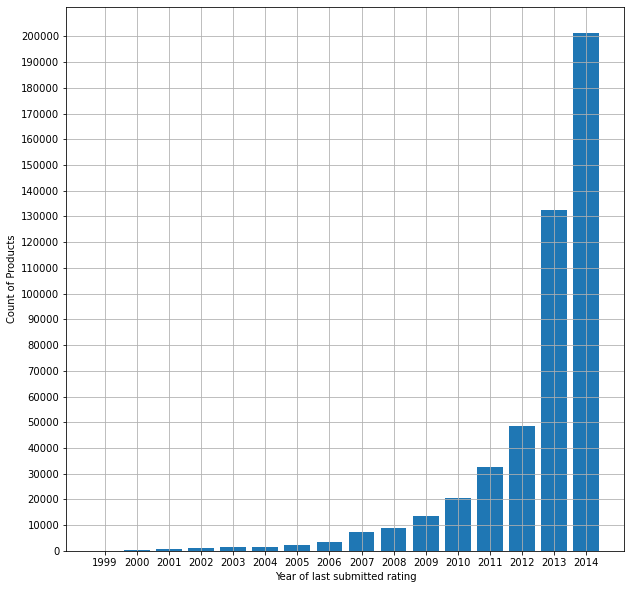

In [41]:
plt.figure(figsize = (10, 10))
plt.bar(df_stats['Year_of_last_rate'], height = df_stats['Count_of_products'])
plt.xticks(df_stats['Year_of_last_rate'])
plt.yticks(ticks = range(0, 210000, 10000), labels = range(0,210000, 10000))
plt.grid()

plt.xlabel('Year of last submitted rating')
plt.ylabel('Count of Products');

In [42]:
# Filter 4. Items with year of last rating < 2013
df_filter4 = df_temp[df_temp['Year_of_last_rate'] <= 2012]

df_data_filt4 = df_data_filt3[~df_data_filt3['Product_id'].isin(set(df_filter4['Product_id']))]
sparse_check(df_data_filt4)

99.99860747992082

Приемлемой разреженности достичь не удалось. Остается лишь применить "грубый" фильтр на всех пользователей, проставивших за все время меньше n рейтингов, где  n = [30, 40, 50]. Таким образом мы заодно избежим влияние рейтингов пользователей, оставивших малое число оценок (и как правило, исключительно положительных), на прогноз.

Подобный фильтр применим и к товарам. Оставим лишь те, что имеют не менее 15 оценок. Будем считать, что для рекомендации остальных товаров мы имеем слишком мало информации.

Следует учитывать, что после применения фильтра на пользователей из набора могут удалиться также и все записи о некоторых товарах с более, чем 15 оценками. На данном этапе мы примем эти потери, после же, возможно, вернемся к этому вопросу.

In [54]:
n_list = [30, 40, 50]
df_agg = pd.DataFrame({
    'User_id': df_data.groupby(by = 'User_id').Rating.count().index,
    'Count': df_data.groupby(by = 'User_id').Rating.count().values
})
df_agg2 = pd.DataFrame({
    'Product_id': df_data.groupby(by = 'Product_id').Rating.count().index,
    'Count': df_data.groupby(by = 'Product_id').Rating.count().values
})
filt2 = df_agg2[df_agg2['Count'] < 15]
for n in n_list:
    filt = df_agg[df_agg['Count'] <= n]
    df_filt = df_data[(~df_data['User_id'].isin(set(filt['User_id']))) & (~df_data['Product_id'].isin(set(filt2['Product_id'])))]
    print(f"Current n = {n}\nCurrent sparsity = {sparse_check(df_filt)}")
    

Current n = 30
Current sparsity = 99.90082862271986
Current n = 40
Current sparsity = 99.84330925058703
Current n = 50
Current sparsity = 99.76634772189999


Можно заметить, что даже при таких грубых фильтрах разреженность матрицы остается выше 99.5% Поэтому применять алгоритм SVD для построения рекомендательной системы мы не сможем.

Для дальнейшей работы оставим фильтр на n = 40.

In [55]:
filt = df_agg[df_agg['Count'] <= 40]
df_data_filt = df_data[(~df_data['User_id'].isin(set(filt['User_id']))) & (~df_data['Product_id'].isin(set(filt2['Product_id'])))]

In [56]:
# Calculating the percent of observations which have passed through the filter
print(f"{100 * (len(df_data_filt) / len(df_data))}% of input data will use in work")

1.810714115004674% of input data will use in work


In [57]:
print(f"Number of observations = {len(df_data_filt)}\nNumber of unique Items = {len(df_data_filt['Product_id'].unique())}\nNumber of unique Users = {len(df_data_filt['User_id'].unique())}")

Number of observations = 141679
Number of unique Items = 35895
Number of unique Users = 2519


# Building Models <a class="anchor" id="6"></a>

## Collaborative-filtering. Item-based. <a class="anchor" id="7"></a>

Так как в нашей выборке имеем кол-во товаров >> кол-ва пользователей, будем строить item-based модель коллаборативной фильтрации.

Для начала необходимо разбить выборку на train & test. Вместо случайного разбиения предлагается использовать подход отсечения последних 20% оценок каждого пользователя. Таким образом мы добьемся того, что:

1. Каждый пользователь внесет вклад в обучение модели
2. Качество модели будет проверено на каждом пользователе
3. Прогноз не будет основываться на "будущем"

In [58]:
df_data_filt.head()

,User_id,Product_id,Rating,TimeStamp,DateTime,Year,Month
118,AT09WGFUM934H,0594481813,3.0,1377907200,2013-08-31 04:00:00,2013,8
200,A3BMUBUC1N77U8,0972683275,4.0,1385164800,2013-11-23 04:00:00,2013,11
389,A6J8D9V5S9MBE,0972683275,5.0,1306886400,2011-06-01 04:00:00,2011,6
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200,2013-07-12 04:00:00,2013,7
583,A11NR4AJK9TNQM,0972683275,4.0,1311552000,2011-07-25 04:00:00,2011,7


In [59]:
# Setting 20% last ratings of each user to the test sample 
# Sorting by time
df_data_filt.sort_values(by = ['DateTime'], inplace = True)

# Splitting obs to the samples for each user
userIds = df_data_filt['User_id'].unique()

X_train_data = []
X_test_data = []
Y_train = []
Y_test = []

for userId in tqdm_notebook(userIds):
    curUser = df_data_filt[df_data_filt['User_id'] == userId]
    idx = int(curUser.shape[0] * 0.8)
    X_train_data.append(curUser[['User_id', 'Product_id']].iloc[:idx, :].values)
    X_test_data.append(curUser[['User_id', 'Product_id']].iloc[idx:, :].values)
    Y_train.append(curUser['Rating'].values[:idx])
    Y_test.append(curUser['Rating'].values[idx:])
    
X_train = pd.DataFrame(np.vstack(X_train_data), columns = ['User_id', 'Product_id'])
X_test = pd.DataFrame(np.vstack(X_test_data), columns = ['User_id', 'Product_id'])
Y_train = np.hstack(Y_train)
Y_test = np.hstack(Y_test)

<ipython-input-59-8dbd6f8141c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_filt.sort_values(by = ['DateTime'], inplace = True)
<ipython-input-59-8dbd6f8141c7>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for userId in tqdm_notebook(userIds):


  0%|          | 0/2519 [00:00<?, ?it/s]

In [60]:
X_train.shape, len(Y_train), X_test.shape, len(Y_test)

((112341, 2), 112341, (29338, 2), 29338)

In [62]:
# Define fuction for calculating the RMSE metric - the most popular metric for this kind of tasks
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

### Building the baseline model by own hands <a class="anchor" id="8"></a>

In [70]:
class ItemBased():
    def fit(self, X, Y, user_col = 'User_id', item_col = 'Product_id'):
        X = X.copy()
        self.users = X[user_col].unique()
        self.items = X[item_col].unique()
        
        X['y'] = Y
        # Calculating the average value fof rating for each user and item
        self.mean_y_user = X.groupby(user_col)['y'].mean()
        self.mean_y_item = X.groupby(item_col)['y'].mean()
        
        # Substract the average rating of the item
        X['y'] -= X[item_col].apply(lambda x: self.mean_y_item[x])
        
        # Building vectors of users' ratings for each item
        # If current user hasn't set a rating, put 0
        self.item_ratings = pd.pivot_table(X, values='y', index=item_col,
                                           columns=user_col, fill_value=0)
        
        # Calculating pairwise similarity between items
        self.item_sim = cosine_similarity(self.item_ratings)
        
        # Building the dictionary item : index in item_ratings
        self.item_pos = dict()
        for item in self.items:
            self.item_pos[item] = np.argwhere(self.item_ratings.index.values == item)[0][0]
        
        return self
    
    def predict_r(self, pr_user, pr_item):
        # If there aren't any obs with this user or item in train sample, return 0 to avoid the affecting on RMSE
        if not pr_item in self.items or not pr_user in self.users:
            return 0
        
        # Calculating the numerator and denominator of the main prediction formula
        numerator = self.item_sim[self.item_pos[pr_item]].dot(self.item_ratings.loc[:, pr_user])
        denominator = np.abs(self.item_sim[self.item_pos[pr_item]]).sum() - 1
        
        return self.mean_y_item[pr_item] + numerator / denominator
    
    def predict(self, X, user_col = 'User_id', item_col = 'Product_id'):
        y = X[[user_col, item_col]].apply(lambda row: self.predict_r(row[0], row[1]), axis = 1)
        return y




In [71]:
%%time
print('Training..')
ib_model = ItemBased().fit(X_train, Y_train)
print('Predicting..')
print(f"rmse = {rmse(Y_test, ib_model.predict(X_test))}")

Training..
Predicting..
rmse = 2.329728723207591
CPU times: user 7min 18s, sys: 1min 18s, total: 8min 37s
Wall time: 1min 44s


Получили Baseline модель с достаточно большой ошибкой.

In [75]:
# ib_model.predict_r(pr_user = 'A3BMUBUC1N77U8', pr_item = '0972683275')

4.532070923680401

### Building models with surprise library <a class="anchor" id="9"></a>

Попробуем построить item-based модели двух типов: KNNBasic и KNNWithMeans. Прогноз первой будет равен сумме взвешенных по похожести рейтингов других товаров, оцененнных рассматриваемым пользователем. Прогноз второй будет равен сумме среднего рейтинга рассматриваемого товара и взвешенной сумме отклонений проставленных рейтингов текущим пользователем от среднего рейтинга каждого из оцененных им товаров.


Достоинство модели KNNWithMeans заключается в том, что она осуществляет центрирование по среднему рейтингу рассматриваемого товара.

Для каждого из типов моделей будем использовать подбор оптимальных параметров по сетке.

#### KNNBasic

In [89]:
Trainset = X_train.copy()
Trainset['Rating'] = Y_train


Testset = X_test.copy()
Testset['Rating'] = Y_test

Trainset.head()

,User_id,Product_id,Rating
0,A1EARN5PUVIF1S,B00000J4FY,5.0
1,A1EARN5PUVIF1S,B00004TS16,5.0
2,A1EARN5PUVIF1S,B00004WHFL,3.0
3,A1EARN5PUVIF1S,B00006AL0S,5.0
4,A1EARN5PUVIF1S,B0000633EO,4.0


In [118]:
# Train and test sets initialization
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(Trainset[['User_id', 'Product_id', 'Rating']], reader)
data_test = Dataset.load_from_df(Testset[['User_id', 'Product_id', 'Rating']], reader)

In [95]:
%%time
# Param Grid initialization and GridSearchCV fitting
sim_options = {
    'name': ['cosine', 'pearson'],                     # Similaruty function
    'min_support': [4],                                # The minimum number of common users (items) for the similarity not to be zero
    'user_based': [False]                              # User-based or Item-based model
}

param_grid = {
    'k': [30],                                         # The actual number of neighbors that are aggregated to compute an estimation (<=k)
    'min_k': [2, 5],                                   # The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. 
    'sim_options': sim_options, 
    'verbose': [False]
}


gs1 = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'],cv = 3)
gs1.fit(data_train)


CPU times: user 3min 28s, sys: 2min 53s, total: 6min 22s
Wall time: 8min 54s


In [96]:
%%time
# Param Grid initialization and GridSearchCV fitting
sim_options = {
    'name': ['pearson_baseline'],                      # Similaruty function
    'min_support': [4],                                # The minimum number of common users (items) for the similarity not to be zero
    'user_based': [False],                             # User-based or Item-based model
    'shrinkage': [20, 50, 100]                         # Regilarization for pirson_baseline function
}

param_grid = {
    'k': [30],                                         # The actual number of neighbors that are aggregated to compute an estimation (<=k)
    'min_k': [2, 5],                                   # The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. 
    'sim_options': sim_options, 
    'verbose': [False]
}


gs2 = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'],cv = 3)
gs2.fit(data_train)



CPU times: user 3min 52s, sys: 3min 51s, total: 7min 43s
Wall time: 11min 5s


In [98]:
# Getting the most optimal parameters
print(f"1\nЛучшее качество = {gs1.best_score['rmse']}\nПараметры: {gs1.best_params['rmse']}\n\n2\nЛучшее качество = {gs2.best_score['rmse']}\nПараметры: {gs2.best_params['rmse']}")


1
Лучшее качество = 1.0693231875372424
Параметры: {'k': 30, 'min_k': 5, 'sim_options': {'name': 'cosine', 'min_support': 4, 'user_based': False}, 'verbose': False}

2
Лучшее качество = 1.0694119882708115
Параметры: {'k': 30, 'min_k': 5, 'sim_options': {'name': 'pearson_baseline', 'min_support': 4, 'user_based': False, 'shrinkage': 50}, 'verbose': False}


#### KNNWithMeans

In [99]:
%%time
# Param Grid initialization and GridSearchCV fitting
sim_options = {
    'name': ['cosine', 'pearson'],                     # Similaruty function
    'min_support': [4],                                # The minimum number of common users (items) for the similarity not to be zero
    'user_based': [False]                              # User-based or Item-based model
}

param_grid = {
    'k': [30],                                         # The actual number of neighbors that are aggregated to compute an estimation (<=k)
    'min_k': [2, 5],                                   # The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. 
    'sim_options': sim_options, 
    'verbose': [False]
}


gs3 = GridSearchCV(KNNWithMeans, param_grid, measures = ['rmse'],cv = 3)
gs3.fit(data_train)



CPU times: user 3min 38s, sys: 3min 6s, total: 6min 45s
Wall time: 9min 25s


In [100]:
%%time
# Param Grid initialization and GridSearchCV fitting
sim_options = {
    'name': ['pearson_baseline'],                      # Similaruty function
    'min_support': [4],                                # The minimum number of common users (items) for the similarity not to be zero
    'user_based': [False],                             # User-based or Item-based model
    'shrinkage': [20, 50, 100]                         # Regilarization for pirson_baseline function
}

param_grid = {
    'k': [30],                                         # The actual number of neighbors that are aggregated to compute an estimation (<=k)
    'min_k': [2, 5],                                   # The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. 
    'sim_options': sim_options, 
    'verbose': [False]
}


gs4 = GridSearchCV(KNNWithMeans, param_grid, measures = ['rmse'],cv = 3)
gs4.fit(data_train)




CPU times: user 3min 56s, sys: 3min 36s, total: 7min 33s
Wall time: 10min 42s


In [101]:
# Getting the most optimal parameters
print(f"1\nЛучшее качество = {gs3.best_score['rmse']}\nПараметры: {gs3.best_params['rmse']}\n\n2\nЛучшее качество = {gs4.best_score['rmse']}\nПараметры: {gs4.best_params['rmse']}")


1
Лучшее качество = 1.1352928115063976
Параметры: {'k': 30, 'min_k': 5, 'sim_options': {'name': 'cosine', 'min_support': 4, 'user_based': False}, 'verbose': False}

2
Лучшее качество = 1.138803054323149
Параметры: {'k': 30, 'min_k': 5, 'sim_options': {'name': 'pearson_baseline', 'min_support': 4, 'user_based': False, 'shrinkage': 20}, 'verbose': False}


Лучшее качество показала модель KNNBasic с параметрами:
{'k': 30, 'min_k': 5, 'sim_options': {'name': 'cosine', 'min_support': 4, 'user_based': False}, 'verbose': False}

Обучим данную модел на всей тренировочной выборке и получим ее качество на тестовой.

In [123]:
# Train and test samples initialization for fit and test methods
trainset = data_train.build_full_trainset()
NA, testset = train_test_split(data_test, test_size = 1.0, shuffle = False)

In [116]:
# Learning the model with the best quality
knn_model = KNNBasic(k = 30, min_k = 5, sim_options = {'name': 'cosine', 'min_support': 4, 'user_based': False}, verbose = True)
knn_model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [130]:
# Estimate the quality of the model on the test set
knn_predictions = knn_model.test(testset)
accuracy.rmse(knn_predictions)

RMSE: 1.0253


1.0253156686771034

На тестовой выборке KNNBasic показала качество более чем в 2 раза лучшее, чем baseline модель. Обучим ее на всем объединенном наборе для дальнейшего использования для прогнозов.

In [132]:
# Learning final model on the whole dataset
reader = Reader(rating_scale=(1, 5))
full_train = Dataset.load_from_df(df_data_filt[['User_id', 'Product_id', 'Rating']], reader)
full_trainset = full_train.build_full_trainset()

final_knn_model = KNNBasic(k = 30, min_k = 5, sim_options = {'name': 'cosine', 'min_support': 4, 'user_based': False}, verbose = True)
final_knn_model.fit(full_trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


## Popular-based algorithms <a class="anchor" id="10"></a>

Однако у моделей коллаборативной фильтрации есть 2 общих недостатка - проблема холодного старта и проблема нетипичных пользователей. В данной работе решается первая из них. В ходе анализа входного набора мы видели, что в нем есть большое число пользователей, проставивших малое число оценок и товаров, имеющих малое число рейтингов. Для них данные алгоритмы могут показать плохое качество, а для пользователей / товаров, ранее не присутствующих в исходном наборе они и вовсе не работают. Для решения данной проблемы было решено использовать Popular-based алгоритмы, позволяющие найти и порекомендовать новым пользователям наиболее популярные товары среди всех остальных пользователей. 

Данные модели будут строиться на всей исходной выборке. Во-первых, это поможет избежать потери нужных рейтингов в ходе фильтрации, во-вторых, используемые алгоритмы позволяют избежать влияния на прогноз товаров с малым числом рейтингов.

В качестве возможной доработки для решения второй проблемы можно предложить следующий подход:
1. Провести кластеризацию пользователей и выявить нетипичных.
2. Для выявленных пользователей найти товары, наиболее скоррелированные с теми, что они уже приобретали и рекомендовать именно их.

Было решено построить сразу несколько Popular-based алгоритмов для их дальнейшей гибридизации.

### The most popular this year <a class="anchor" id="11"></a>

Модель 1.

Суть первой модели будет заключаться в нахождении наиболее популярных товаров за последний год. Будем считать их наиболее актуальными. Таким образом будут учитываться текущие тренды и потребности покупателей.

Сортировать товары будем не только по их среднему рейтингу, но и по кол-ву проставленных рейтингов. Таким образом, рекомендоваться будут в первую очередь те товары, которые часто покупаются (а значит пользуются спросом) и среди них уже будут отбираться товары с наибольшим средним рейтингом. Также это позволит избежать влияния товаров с малым числом наивысших рейтингов.

In [133]:
# Getting ratings of the last year
cur_year = df_data.Year.max()
df_year = df_data[df_data['Year'] == cur_year]

In [136]:
# Aggregation
df_year_agg = pd.DataFrame({
    'Product_id': df_year.groupby(by = 'Product_id').Rating.mean().index,
    'Mean_rating': df_year.groupby(by = 'Product_id').Rating.mean().values,
    'Count_of_ratings': df_year.groupby(by = 'Product_id').Rating.count().values
})
df_year_agg.head()

,Product_id,Mean_rating,Count_of_ratings
0,0511189877,4.500000,6
1,0528881469,4.666667,3
2,059400232X,5.000000,1
3,0594012015,3.000000,2
4,0594017580,3.000000,1


In [141]:
# Getting Top-10 items
df_year_agg_sort = df_year_agg.sort_values(by = ['Count_of_ratings', 'Mean_rating'], ascending = False)

n = 10
top_n = df_year_agg_sort[:n]
top_n

,Product_id,Mean_rating,Count_of_ratings
158640,B00DR0PDNE,3.987882,9985
102308,B007WTAJTO,4.541258,5199
124253,B009SYZ8OC,4.225663,4037
118916,B009A5204K,4.017753,3774
46318,B003ES5ZUU,4.703036,3492
139466,B00BGGDVOO,4.392310,3199
46249,B003ELYQGG,4.398866,3174
85155,B005X1Y7I2,4.461564,2966
139398,B00BGA9WK2,4.213764,2877
100420,B007R5YDYA,4.697748,2842


### Weighted rating system <a class="anchor" id="12"></a>

Модель 2.

Данные алгоритм подразумевает расчет нового рейтинга для каждого товара по следующей формуле:

    WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C, where
- R is the average rating for the item.
- v is the number of votes for the item.
- m is the minimum votes required to be listed in the popular items(defined by > percentile 80 of total votes)
- C is the average rating across the whole dataset.

Данный подход приводит к тому, что у товаров с большим числом оценок посчитанный рейтинг будет близок к их среднему, а у товаров с малым числом оценок посчитанный рейтинг будет близок к среднему рейтингу по всей выборке.

In [143]:
# Calculating R and v for each item
df_agg = pd.DataFrame({
    'Product_id': df_data.groupby(by = 'Product_id').Rating.mean().index,
    'Mean_rating_R_': df_data.groupby(by = 'Product_id').Rating.mean().values,
    'Count_of_ratings_v_': df_data.groupby(by = 'Product_id').Rating.count().values
})
df_agg.head()

,Product_id,Mean_rating_R_,Count_of_ratings_v_
0,0132793040,5.000000,1
1,0321732944,5.000000,1
2,0439886341,1.666667,3
3,0511189877,4.500000,6
4,0528881469,2.851852,27


In [146]:
# Calculating m and C
m = df_agg.Count_of_ratings_v_.quantile(0.9)
print(f"The minimum ratings required to be listed in the chart is {m}")

C = df_agg.Mean_rating_R_.mean()
print(f"The average rating across the whole dataset is {C}")

The minimum ratings required to be listed in the chart is 25.0
The average rating across the whole dataset is 3.889700263013443


In [148]:
# Filtering items with less than m ratings
df_agg_filt = df_agg[df_agg['Count_of_ratings_v_'] >= m]
df_agg_filt.shape

(48174, 3)

In [151]:
# Define a fucntion to calculate the target score
def score_calc(obs):
    v = obs['Count_of_ratings_v_']
    R = obs['Mean_rating_R_']
    return (v / (v + m) * R) + (m / (m + v) * C)

# Calculating scores
df_agg_filt['Score'] = df_agg_filt.apply(lambda x: score_calc(x), axis = 1)

# Sorting items by the score
df_agg_filt.sort_values(by = 'Score', ascending = False, inplace = True)
df_agg_filt.head()

<ipython-input-151-d8a5f257ee13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_filt['Score'] = df_agg_filt.apply(lambda x: score_calc(x), axis = 1)
<ipython-input-151-d8a5f257ee13>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_filt.sort_values(by = 'Score', ascending = False, inplace = True)


,Product_id,Mean_rating_R_,Count_of_ratings_v_,Score
207782,B0043WJRRS,4.881369,2512,4.871597
414879,B00CG70K78,4.949367,237,4.848254
324655,B007SZ0E1K,4.895323,449,4.842284
180308,B003FVVMS0,4.853412,1876,4.840738
166101,B0033PRWSW,4.901809,387,4.840394


Недостатком данного подхода является то, что товарам с малым чилом рейтингов будет присвоен score, близкий к среднему рейтигу по всей выборке. Это может привести к выводу их в топ при большом значении среднего. Однако в нашем случае средний рейтинг = 3.88, и данная проблема нам не грозит.

### RecSys with custom rating score <a class="anchor" id="13"></a>

Модель 3.

Суть данного подхода будет заключаться в расчете нового рейтинга для каждого товара по формуле:

score = mean rate of the item * count of rates of the item

Данный подход так же позволяет избежать влияния на прогноз товаров с малым числом рейтингов. На итоговый score влияют как число оценок, так и их среднее.

In [154]:
# Calculating the new score
df_agg_2 = df_agg.copy()
df_agg_2['Score'] = df_agg_2.apply(lambda x: x['Mean_rating_R_'] * x['Count_of_ratings_v_'], axis = 1)

# Sorting by the new score
df_agg_2.sort_values(by = 'Score', ascending = False, inplace = True)
df_agg_2.head()

,Product_id,Mean_rating_R_,Count_of_ratings_v_,Score
308398,B0074BW614,4.491504,18244,81943.0
429572,B00DR0PDNE,3.931020,16454,64681.0
327308,B007WTAJTO,4.424005,14172,62697.0
102804,B0019EHU8G,4.754497,12285,58409.0
296625,B006GWO5WK,4.314657,12226,52751.0


### Comparison of results <a class="anchor" id="14"></a>

In [250]:
print("Rating-weighted score:\n", df_agg_filt.head(10))
print("\nCustom rate-score: \n", df_agg_2.head(10))
print(f"\nCount of intersections = {len(set(df_agg_filt['Product_id'].head(10)).intersection(set(df_agg_2['Product_id'].head(10))))}")


Rating-weighted score:
         Product_id  Mean_rating_R_  Count_of_ratings_v_     Score
207782  B0043WJRRS        4.881369                 2512  4.871597
414879  B00CG70K78        4.949367                  237  4.848254
324655  B007SZ0E1K        4.895323                  449  4.842284
180308  B003FVVMS0        4.853412                 1876  4.840738
166101  B0033PRWSW        4.901809                  387  4.840394
354040  B008VGCT9K        4.939130                  230  4.836245
137519  B0029N3U8K        4.869301                  658  4.833444
204700  B0041OYTJE        4.879913                  458  4.828659
454884  B00GMRCAC6        4.951872                  187  4.826616
323018  B007R5YGO2        4.836907                 1306  4.819115

Custom rate-score: 
         Product_id  Mean_rating_R_  Count_of_ratings_v_    Score
308398  B0074BW614        4.491504                18244  81943.0
429572  B00DR0PDNE        3.931020                16454  64681.0
327308  B007WTAJTO        4.42400

Пересечений в рекомендациях, полученных данными методами, нет. Можно заметить, что первый алгоритм возвращает товары с бОльшим средним рейтингом и при этом имеющие приемлемое число оценок. Второй же алгоритм отдает предпочтение в первую очередь тем товарам, которые имеют наибольшее число оценок.

Скомбинировав оба подхода, мы можем выдавать пользователю как товары с наивысшими рейтингами, так и наиболее часто покупаемые товары (при допущении о том, что имеется прямо пропорциональная зависимость между числом купленных единиц товара и числом его оценок). 

Недостатком всех Popular-based алгоритмов является неперсонализированность рекомендаций, так как они строятся на основе всех рейтингов в наборе. Именно поэтому использовать только их предлагается исключительно для новых пользователей и для пользователей, которые оставили мало оценок (меньше 30) для составления картины об их предпочтениях. Для остальных же пользователей было решено использовать данные алгоритмы лишь для получения дополнительных рекомендаций для более "широкого" покрытия возможных предпочтений. Основные же рекомендации они будут получать от построенной ранее модели коллаборативной фильтрации.

# Building Final Recommendation System <a class="anchor" id="15"></a>

Для использования преимуществ всех построенных моделей, а также для наиболее широкого охвата возможных рекомендаций было решено построть гибридную рекомендательную систему. Алгоритм получения рекомендаций для очередного пользователя состоит в следующем:

1. Если данный пользователь за все время проставил менее 30 рейтингов, то пользователь получит следующие рекомендации:
- 5 товаров - наиболее популярные товары в текущем году (модель 1)
- 5 товаров - рекомендации, полученные с помощью модели 2
- 5 товаров - рекомендации, полученные с помощью модели 3
2. Если данный пользователь за все время проставил 30 и более рейтингов, то пользователь получит следующие рекомендации:
- 9 товаров - рекомендации, полученные с помощью модели KNNBasic
- по 2 рекомендации, полученные с помощью каждой из Popular-based моделей.

В каждом из случаев система выдает 15 рекомендаций.

In [247]:
# Define a function to get prediction from KNN best model
def predict_cf(user_id):
    with_rates = set(df_data_filt[df_data_filt['User_id'] == user_id].Product_id) # Items which are alredy estimated by this user
    item_set = set(df_data_filt[~df_data_filt['Product_id'].isin(with_rates)].Product_id) # Items which are not already estimated by this user

    # Building a sorted dict: {'item_id' : predicted rating} and getting top from it
    pred_dict = defaultdict(float)
    for item_id in item_set:
        prediction = final_knn_model.predict(user_id, item_id, clip=True, verbose=False)
        pred_dict[prediction.iid] = prediction.est
    pred_dict = sorted(pred_dict.items(), key = lambda x: x[1], reverse = True)[:9]
    top = [x[0] for x in pred_dict]

    return top


# Define an actual set of users who have more than 30 rates
user_set = set(df_data_filt['User_id'])

# Define a function to get final recommendation
def predict_recs(user_id):
    top = []
    if user_id in user_set:
        top = predict_cf(user_id)                            # From KNNBasic model
        top.extend(list(df_year_agg_sort['Product_id'][:2])) # From model 0
        top.extend(list(df_agg_filt['Product_id'][:2]))      # From model 1
        top.extend(list(df_agg_2['Product_id'][:2]))         # From model 2
        
    else:
        top.extend(list(df_year_agg_sort['Product_id'][:5])) # From model 0
        top.extend(list(df_agg_filt['Product_id'][:5]))      # From model 1
        top.extend(list(df_agg_2['Product_id'][:5]))         # From model 2
        
    return top
        

In [249]:
# Getting final recommendations for random user
predict_recs('A3BMUBUC1N77U8')

['B00834SJNA',
 'B001XURP7W',
 'B005FYNSPK',
 'B0041Q38NU',
 'B000LRMS66',
 'B002V88HFE',
 'B005HMKKH4',
 'B0019EHU8G',
 'B000N99BBC',
 'B00DR0PDNE',
 'B007WTAJTO',
 'B0043WJRRS',
 'B00CG70K78',
 'B0074BW614',
 'B00DR0PDNE']

В ходе данной работы была построена гибридная рекомендательная система, позволяющая получать рекомендации как для новых пользователей, так и для уже совершавших покупки на Amazon.